In [4]:
#load modules
from matplotlib import pyplot as plt
import numpy as np
from spectral1d import solve_nonlinear_problem # needed module
from overscreening_breakdown import overscreening_breakdown #needed module
%matplotlib inline

In [5]:
#init the problem
problem = overscreening_breakdown()

In [6]:
#set up the solver
N = 100
domain = [0,np.inf]
tolerance = 1.0e-10
use_method = "newton"
L = 6
solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method=use_method)
solver.set_mapping_parameter(L)

In [8]:
#set up problem.
#If a parameter is not given, then a default value is used instead. See the source file of "overscreening_breakdown" for more details

sigma = 10.0
mu = 1
gamma = 1
delta = 10.0
u0 = 1.0
u0xxx = 0

def some_func(x):
    return u0*np.exp(-x**4)

problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

In [9]:
#pass the problem to the solver
solver.set_problem(problem)

In [10]:
# solve the problem
c = solver.solve_problem()

newton: relative target tolerance =  1.0099504938362078e-09
newton: iteration  1 , residual norm  0.00017880318617095786 , wight =  1.0
newton: iteration  2 , residual norm  2.0995810522577122e-07 , wight =  1.0
newton: iteration  3 , residual norm  9.561047168757734e-13 , wight =  1.0
converged with norm =  9.561047168757734e-13


In [11]:
#optionally save and load a solution for further use
#solution is stored in expension coefficients
solver.save_solution("solution.pickle", c)
c1 = solver.load_data("solution.pickle")
print("checking difference in saved data: ", np.linalg.norm(c-c1))

checking difference in saved data:  0.0


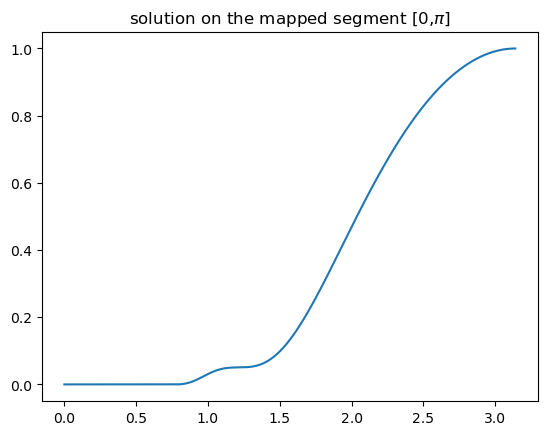

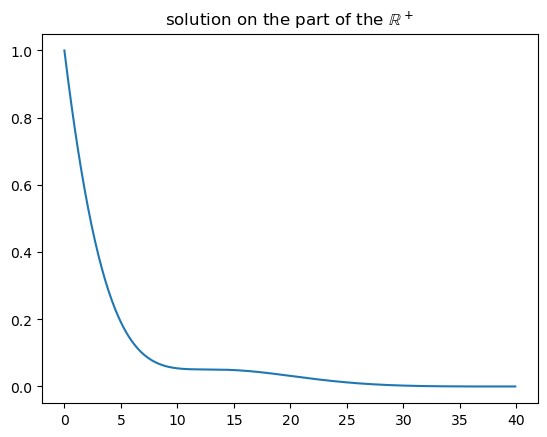

In [12]:
#see the solution
t = np.arange(0, np.pi, 0.01)
sol = solver.obtain_solution_in_basis(c, t)
plt.title("solution on the mapped segment [0,$\pi$]")
plt.plot(t, sol)
plt.show()
x = np.arange(0.0, 40.0, 0.1)
sol = solver.obtain_solution_in_domain(c, x)
plt.title("solution on the part of the $\mathbb{R}^+$")
plt.plot(x, sol)
plt.show()

Next we demonstrate the applicaiton of the size globalization for a very stiff problem using globalization in the size of the problem thanx to the natural behaviour of the spectral methods.

In [13]:
sigma = 10.0
mu = 1
gamma = 1/2
delta = 50.0
u0 = 200.0
u0xxx = 0

def some_func(x):
    return np.exp(-x**2) #initial guess should be u0*np.exp(-x**2). This breaks the problem convergence

problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

In [14]:
# normal size problem fails to converge due to very stiff nonlinearity (artificially made)
N = 100
solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method=use_method, total_iterations = 20, use_globalization = False)
solver.set_mapping_parameter(L)
solver.set_problem(problem)
c = solver.solve_problem()

newton: relative target tolerance =  1.0099504938362078e-09
newton: failed to converge with norm:  nan  with wight:  0.5
failed to converge with norm =  19.80295085955572


/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: overflow encountered in sinh
  num = (np.sinh(u) - self.__g_func(x)*0.5*self.__mu*np.exp(u) )*np.exp(-q*x)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: overflow encountered in exp
  num = (np.sinh(u) - self.__g_func(x)*0.5*self.__mu*np.exp(u) )*np.exp(-q*x)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: invalid value encountered in subtract
  num = (np.sinh(u) - self.__g_func(x)*0.5*self.__mu*np.exp(u) )*np.exp(-q*x)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:52: RuntimeWarning: overflow encountered in sinh
  din = (1 + 2.0*self.__gamma*np.sinh(u/2.0)**2)
/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:51: RuntimeWarning: invalid value encountered in multiply
  num = (np.sin

In [15]:
# we perfrom a set of iterations to update a better initial guess from the smaller problem size
N_base = 20
N = N_base
c1 = None
for it in range(2,11):
    print("running on N = ", N)
    solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method=use_method, total_iterations = 20, use_globalization = False)
    solver.set_mapping_parameter(L)
    solver.set_problem(problem)
    c = solver.solve_problem(c1)
    if solver.is_converged():
        c1 = np.copy(c)
        N = N_base*it
    else:
        N = N - 1

running on N =  20
newton: relative target tolerance =  4.69041575982343e-10
newton: iteration  1 , residual norm  0.027949278593217795 , wight =  1.0
newton: iteration  2 , residual norm  0.0005847736267105601 , wight =  1.0
newton: iteration  3 , residual norm  1.2185466710156891e-05 , wight =  1.0
newton: iteration  4 , residual norm  2.5961927566237155e-06 , wight =  1.0
newton: iteration  5 , residual norm  2.5786453015996697e-07 , wight =  1.0
newton: iteration  6 , residual norm  3.5765332315541933e-09 , wight =  1.0
newton: iteration  7 , residual norm  1.2492219768871853e-11 , wight =  1.0
converged with norm =  1.2492219768871853e-11
running on N =  40


/home/noctum/Documents/Programs/Unboundede_domain/repository/spectral1d.py:63: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/x


newton: relative target tolerance =  6.480740698407861e-10
newton: iteration  1 , residual norm  0.00032751070677625854 , wight =  1.0
newton: iteration  2 , residual norm  0.0001856819424696518 , wight =  1.0
newton: iteration  3 , residual norm  3.368033094700917e-05 , wight =  1.0
newton: iteration  4 , residual norm  7.262814732564465e-07 , wight =  1.0
newton: iteration  5 , residual norm  4.950909127558586e-09 , wight =  1.0
newton: iteration  6 , residual norm  2.1149569029728964e-10 , wight =  1.0
converged with norm =  2.1149569029728964e-10
running on N =  60
newton: relative target tolerance =  7.874007874011811e-10
newton: iteration  1 , residual norm  3.4806389327596615e-05 , wight =  1.0
newton: iteration  2 , residual norm  8.187903239274814e-07 , wight =  1.0
newton: iteration  3 , residual norm  2.858820565038503e-10 , wight =  1.0
converged with norm =  2.858820565038503e-10
running on N =  80
newton: relative target tolerance =  9.055385138137418e-10
newton: iteratio

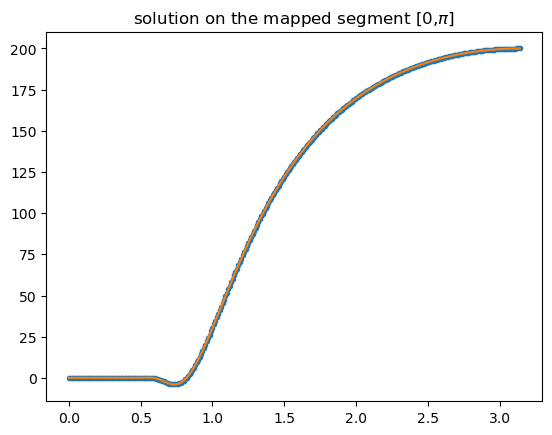

In [16]:
#and check 2 final consecutive solutions 
t = np.arange(0, np.pi, 0.01)
sol1 = solver.obtain_solution_in_basis(c1, t)
sol = solver.obtain_solution_in_basis(c, t)
plt.title("solution on the mapped segment [0,$\pi$]")
plt.plot(t, sol1, '.')
plt.plot(t, sol)
plt.show()

Next we demonstrate the applicaiton of the homotopy* globalization for the same stiff problem.

*https://en.wikipedia.org/wiki/Homotopy

In [17]:
solver = solve_nonlinear_problem(N=100, domain=[0,np.inf], tolerance=tolerance, use_method="newton", total_iterations = 20, use_globalization = True)
solver.set_mapping_parameter(L)
solver.set_problem(problem)

In [18]:
c2 = solver.solve_problem()

newton: relative target tolerance =  1.0099504938362078e-09
newton: failed to converge with norm:  nan  with wight:  0.5
newton: residual norm =  19.80295085955572  with homotopy =  1.25
newton: failed to converge with norm:  nan  with wight:  0.5
newton: residual norm =  19.802950859553494  with homotopy =  1.5625
newton: failed to converge with norm:  nan  with wight:  0.5
newton: residual norm =  19.80295085955148  with homotopy =  1.953125
newton: failed to converge with norm:  nan  with wight:  0.5
newton: residual norm =  19.80295085954964  with homotopy =  2.44140625
newton: failed to converge with norm:  nan  with wight:  0.5
newton: residual norm =  19.802950859547984  with homotopy =  3.0517578125
newton: failed to converge with norm:  nan  with wight:  0.5
newton: residual norm =  19.80295085954649  with homotopy =  3.814697265625
newton: failed to converge with norm:  nan  with wight:  0.5
newton: residual norm =  19.802950859545142  with homotopy =  4.76837158203125
newton

/home/noctum/Documents/Programs/Unboundede_domain/repository/overscreening_breakdown.py:61: RuntimeWarning: overflow encountered in double_scalars
  din = 2*(1 - self.__gamma + self.__gamma*np.cosh(u))**2


newton: iteration  2 , residual norm  3.731404410087557e-09 , wight =  1.0
newton: iteration  3 , residual norm  1.52454289954252e-10 , wight =  1.0
newton: residual norm =  3.50654558034834e-05  with homotopy =  4.656612873077393
newton: iteration  1 , residual norm  1.66133453261911e-11 , wight =  1.0
newton: residual norm =  4.1111017417142517e-05  with homotopy =  2.3283064365386963
newton: iteration  1 , residual norm  7.913409604869407e-11 , wight =  1.0
newton: residual norm =  4.765798511526893e-05  with homotopy =  1.1641532182693481
newton: iteration  1 , residual norm  9.662876500345676e-11 , wight =  1.0
newton: residual norm =  5.436831895368387e-05  with homotopy =  0.5820766091346741
newton: iteration  1 , residual norm  2.7990831116862106e-10 , wight =  1.0
newton: residual norm =  6.110388953878173e-05  with homotopy =  0.29103830456733704
newton: iteration  1 , residual norm  4.0909493885159756e-10 , wight =  1.0
newton: residual norm =  6.87472247653314e-05  with hom

newton: iteration  1 , residual norm  1.5334850185775427e-10 , wight =  1.0
newton: residual norm =  1.5772308476902892e-08  with homotopy =  1.734723475976807e-06
newton: iteration  1 , residual norm  2.4289150052416025e-10 , wight =  1.0
newton: residual norm =  7.89001031485407e-09  with homotopy =  8.673617379884035e-07
newton: iteration  1 , residual norm  2.226102340815875e-10 , wight =  1.0
newton: residual norm =  3.949556833611547e-09  with homotopy =  4.336808689942018e-07
newton: iteration  1 , residual norm  2.591194724919863e-10 , wight =  1.0
newton: residual norm =  1.98861655204254e-09  with homotopy =  2.168404344971009e-07
newton: iteration  1 , residual norm  7.661942560260872e-11 , wight =  1.0
newton: residual norm =  9.888228357515761e-10  with homotopy =  1.0842021724855044e-07
newton: iteration  1 , residual norm  3.2471079592895256e-10 , wight =  1.0
newton: residual norm =  5.902509458471663e-10  with homotopy =  5.421010862427522e-08
newton: iteration  1 , re

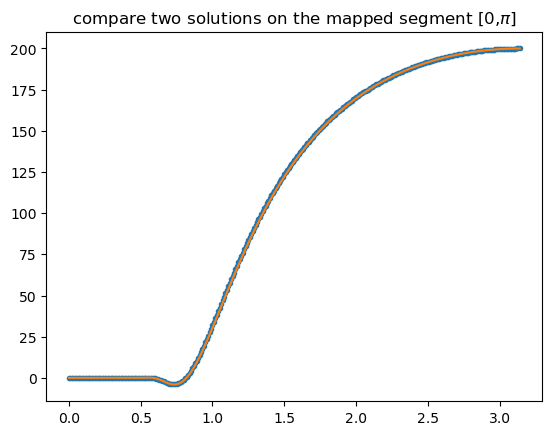

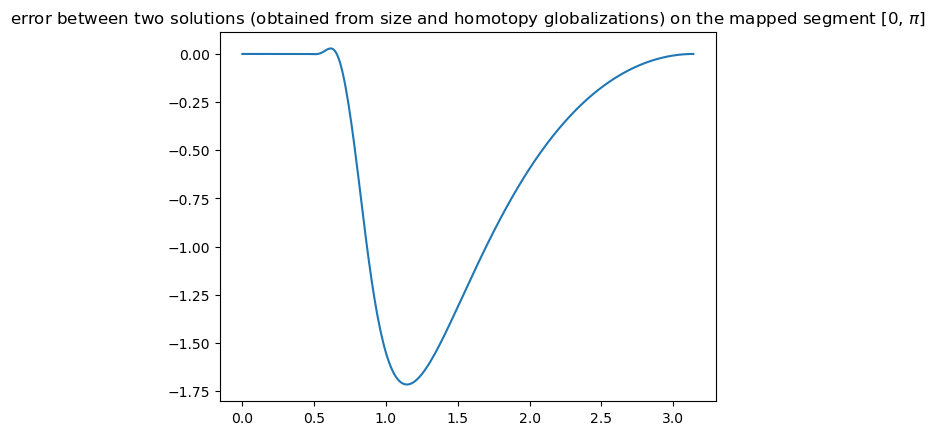

In [19]:
#and demonstrate the converged solution compared with the previous one
t = np.arange(0, np.pi, 0.01)
sol = solver.obtain_solution_in_basis(c1, t)
sol2 = solver.obtain_solution_in_basis(c2, t)
plt.title("compare two solutions on the mapped segment [0,$\pi$]")
plt.plot(t, sol2,'.')
plt.plot(t, sol)
plt.show()
plt.title("error between two solutions (obtained from size and homotopy globalizations) on the mapped segment [0, $\pi$]")
plt.plot(t, sol-sol2)
plt.show()

**Here we demonstrate how to find a stable value of the mapping parameter L for the given problem.**

One should choose the smallest possible value of L at which the solutions are stable w.r.t. the discretization

In [20]:
sigma = 10.0
mu = 1
gamma = 1/2
delta = 10.0
u0 = 1.0
u0xxx = 0

def some_func(x):
    return u0*np.exp(-x**2) #solution initial guess

problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)

newton: relative target tolerance =  5.656854249492381e-10
newton: iteration  1 , residual norm  0.00035901656655514246 , wight =  1.0
newton: iteration  2 , residual norm  9.808966115673217e-08 , wight =  1.0
newton: iteration  3 , residual norm  2.8619575280115093e-10 , wight =  1.0
converged with norm =  2.8619575280115093e-10
newton: relative target tolerance =  8.48528137423857e-10
newton: iteration  1 , residual norm  0.0001631183213257188 , wight =  1.0
newton: iteration  2 , residual norm  4.405548131115009e-07 , wight =  1.0
newton: iteration  3 , residual norm  8.806373166781341e-09 , wight =  1.0
newton: iteration  4 , residual norm  7.089136334130295e-09 , wight =  0.0625
newton: iteration  5 , residual norm  3.7222882832935273e-09 , wight =  0.0625
newton: iteration  6 , residual norm  2.3192966554602877e-09 , wight =  1.862645149230957e-09
newton: iteration  7 , residual norm  1.2426049879439724e-09 , wight =  3.725290298461914e-09
newton: failed to converge with norm:  2

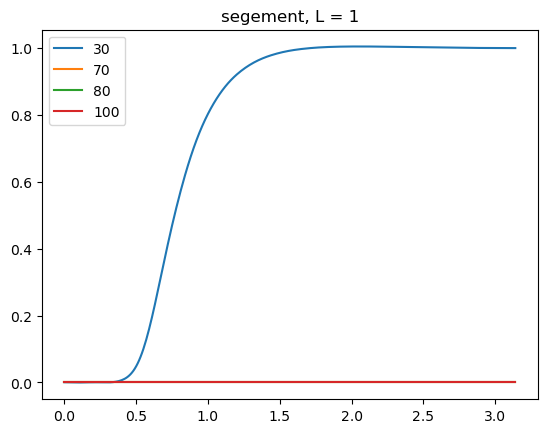

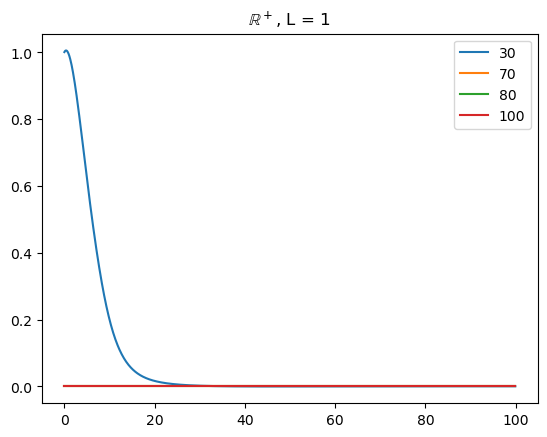

newton: relative target tolerance =  5.656854249492381e-10
newton: iteration  1 , residual norm  0.00010696792586387455 , wight =  1.0
newton: iteration  2 , residual norm  3.1934788789992775e-08 , wight =  1.0
newton: iteration  3 , residual norm  8.063132221596404e-12 , wight =  1.0
converged with norm =  8.063132221596404e-12
newton: relative target tolerance =  8.48528137423857e-10
newton: iteration  1 , residual norm  9.199289867029341e-07 , wight =  1.0
newton: iteration  2 , residual norm  8.526879688798708e-11 , wight =  1.0
converged with norm =  8.526879688798708e-11
newton: relative target tolerance =  9.055385138137418e-10
newton: iteration  1 , residual norm  3.7095246346800414e-10 , wight =  1.0
converged with norm =  3.7095246346800414e-10
newton: relative target tolerance =  1.0099504938362078e-09
newton: iteration  1 , residual norm  3.7979041783767476e-10 , wight =  1.0
converged with norm =  3.7979041783767476e-10


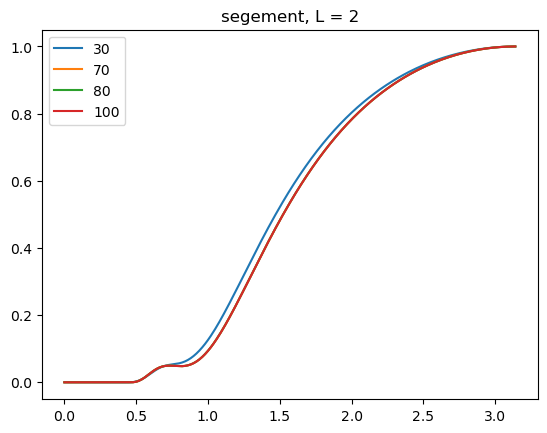

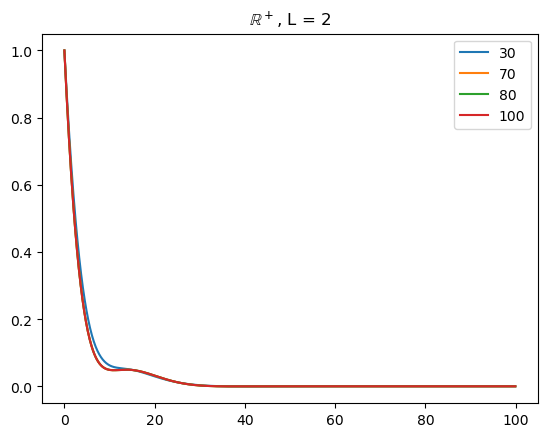

newton: relative target tolerance =  5.656854249492381e-10
newton: iteration  1 , residual norm  8.685090681447426e-05 , wight =  1.0
newton: iteration  2 , residual norm  2.8045006627520798e-08 , wight =  1.0
newton: iteration  3 , residual norm  1.9411894917118997e-12 , wight =  1.0
converged with norm =  1.9411894917118997e-12
newton: relative target tolerance =  8.48528137423857e-10
newton: iteration  1 , residual norm  4.513125468143785e-08 , wight =  1.0
newton: iteration  2 , residual norm  3.811798904253448e-12 , wight =  1.0
converged with norm =  3.811798904253448e-12
newton: relative target tolerance =  9.055385138137418e-10
newton: iteration  1 , residual norm  3.62134552287647e-11 , wight =  1.0
converged with norm =  3.62134552287647e-11
newton: relative target tolerance =  1.0099504938362078e-09
newton: iteration  1 , residual norm  1.8343527292428837e-11 , wight =  1.0
converged with norm =  1.8343527292428837e-11


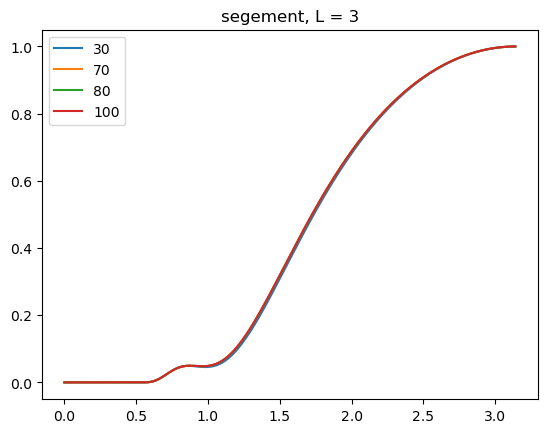

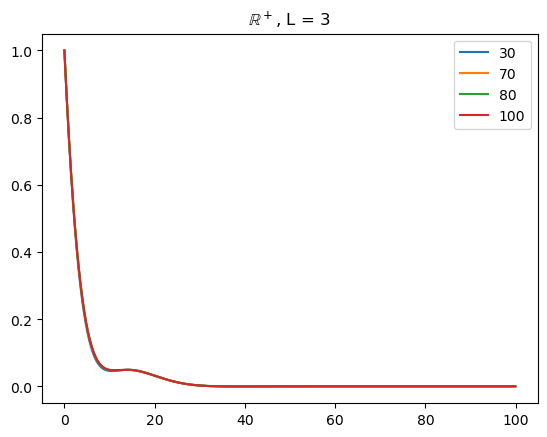

newton: relative target tolerance =  5.656854249492381e-10
newton: iteration  1 , residual norm  8.789434484218448e-05 , wight =  1.0
newton: iteration  2 , residual norm  2.8994259282858938e-08 , wight =  1.0
newton: iteration  3 , residual norm  5.46297302308426e-13 , wight =  1.0
converged with norm =  5.46297302308426e-13
newton: relative target tolerance =  8.48528137423857e-10
newton: iteration  1 , residual norm  3.3335015882302635e-10 , wight =  1.0
converged with norm =  3.3335015882302635e-10
newton: relative target tolerance =  9.055385138137418e-10
newton: iteration  1 , residual norm  1.5517911866219254e-12 , wight =  1.0
converged with norm =  1.5517911866219254e-12
newton: relative target tolerance =  1.0099504938362078e-09
newton: iteration  1 , residual norm  2.371903602289259e-12 , wight =  1.0
converged with norm =  2.371903602289259e-12


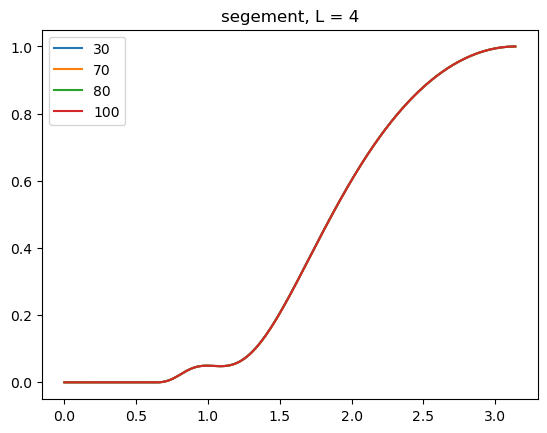

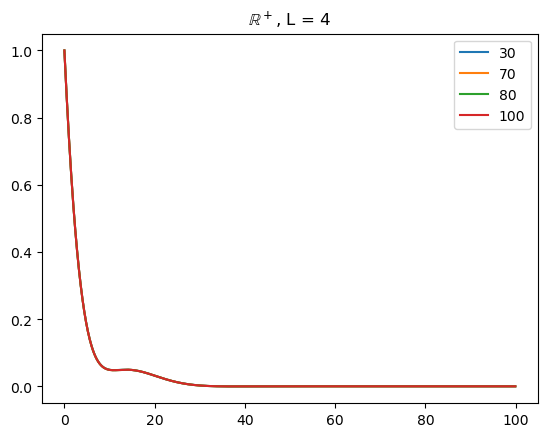

newton: relative target tolerance =  5.656854249492381e-10
newton: iteration  1 , residual norm  8.561033838113926e-05 , wight =  1.0
newton: iteration  2 , residual norm  2.8996668029138034e-08 , wight =  1.0
newton: iteration  3 , residual norm  2.751287894420875e-13 , wight =  1.0
converged with norm =  2.751287894420875e-13
newton: relative target tolerance =  8.48528137423857e-10
newton: iteration  1 , residual norm  3.299906587278989e-10 , wight =  1.0
converged with norm =  3.299906587278989e-10
newton: relative target tolerance =  9.055385138137418e-10
newton: iteration  1 , residual norm  5.020420760572176e-13 , wight =  1.0
converged with norm =  5.020420760572176e-13
newton: relative target tolerance =  1.0099504938362078e-09
newton: iteration  1 , residual norm  3.663389137513928e-13 , wight =  1.0
converged with norm =  3.663389137513928e-13


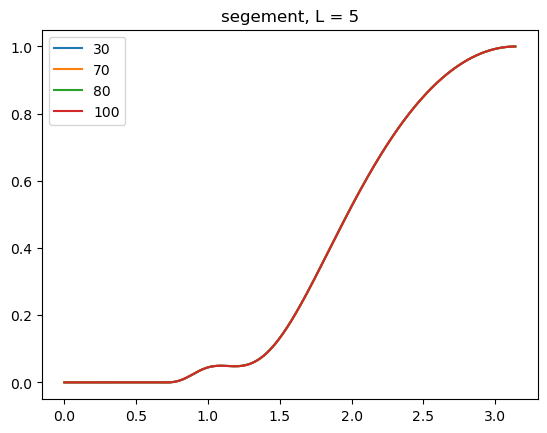

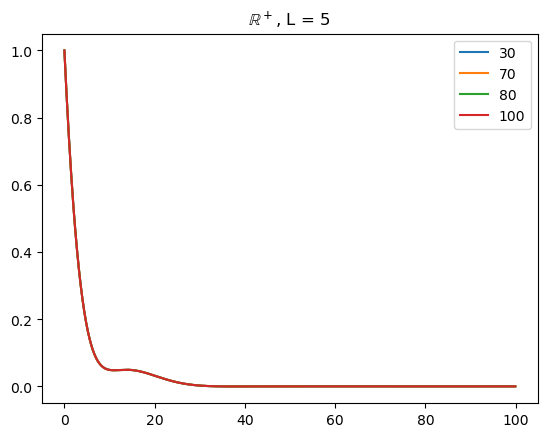

For this problem it is recomended to use L=4.


In [21]:
Nall = [30,70,80,100]
Lall = [1,2,3,4,5]
t = np.arange(0, np.pi, 0.01)
x = np.arange(0, 100, 0.1)
for L in Lall:
    c_dict = {}
    c1 = None
    for N in Nall:
        solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method="newton", total_iterations = 20, use_globalization = False)
        solver.set_mapping_parameter(L)
        solver.set_problem(problem)
        c = solver.solve_problem(c1)
        c_dict[N] = c
        c1 = np.copy(c)
    for N in Nall:
        c_l = c_dict[N]
        sol = solver.obtain_solution_in_basis(c_l, t)
        plt.plot(t, sol, label=N)
        
    plt.legend()
    plt.title("segement, L = " + str(L))
    plt.show()
    
    for N in Nall:
        c_l = c_dict[N]
        sol = solver.obtain_solution_in_domain(c_l, x)
        plt.plot(x, sol, label=N)
        
    plt.legend()
    plt.title("$\mathbb{R}^+$, L = " + str(L))
    plt.show()    
    
print("For this problem it is recomended to use L=4.")

newton: relative target tolerance =  1.0099504938362078e-09
newton: iteration  1 , residual norm  0.005097207502964341 , wight =  1.0
newton: iteration  2 , residual norm  2.023072834355502e-06 , wight =  1.0
newton: iteration  3 , residual norm  6.245184057990477e-13 , wight =  1.0
converged with norm =  6.245184057990477e-13


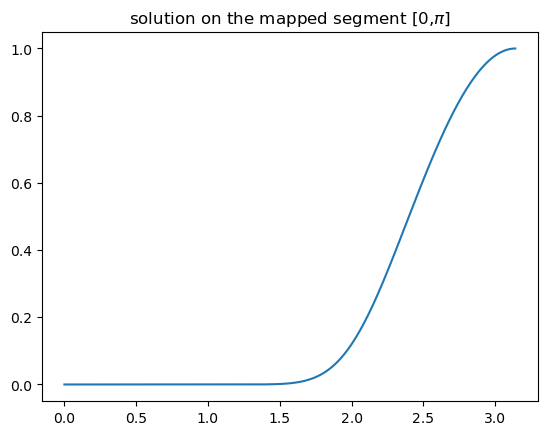

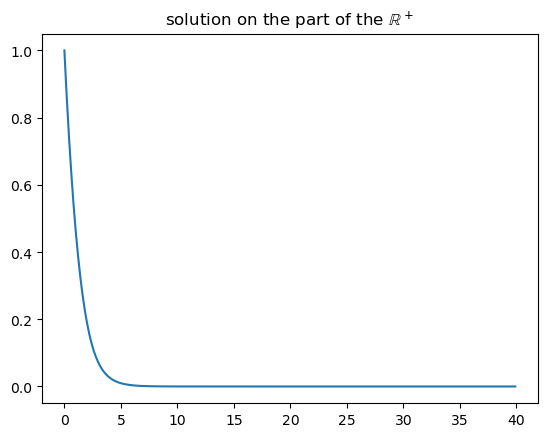

In [15]:
#Example on hw to solve the Poisson problem.
# u_xx = f(x,u)

sigma = 1.0
mu = 1
gamma = 1
delta = 0.0  # remove the 4-th order derivative
u0 = 1.0     
u0xxx = None # remove the third derivative boundary condition


def some_func(x):
    return u0*np.exp(-x**4)
problem = overscreening_breakdown()
problem.set_parameters(sigma = sigma, mu = mu, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)
#pass the problem to the solver
solver.set_problem(problem)
# solve the problem
c = solver.solve_problem()

#see the solution
t = np.arange(0, np.pi, 0.01)
sol = solver.obtain_solution_in_basis(c, t)
plt.title("solution on the mapped segment [0,$\pi$]")
plt.plot(t, sol)
plt.show()
x = np.arange(0.0, 40.0, 0.1)
sol = solver.obtain_solution_in_domain(c, x)
plt.title("solution on the part of the $\mathbb{R}^+$")
plt.plot(x, sol)
plt.show()